# Trends

Temperatures drop down we get closer to the northern hemisphere.
Temperatures goes up as we move down towards southern hemisphere. 
by looking at the plots we can see that Latitude has direct affect on the temperatures and not so much on humidity, cloudiness and windspeed directly. humidity, cloudiness and windspeed are more directly related to temperatures.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:

lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

In [3]:
len (cities)

610

In [4]:
#OpenWeather Key
api_key = weather_api_key
units = "imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

# define count of pass throughs
count_one = 0
set_one = 1


In [5]:
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
       print("City not found. Skipping...")

Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | isangel
Processing Record 8 of Set 1 | madimba
Processing Record 9 of Set 1 | luderitz
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | saint-augustin
City not found. Skipping...
Processing Record 12 of Set 1 | okakarara
Processing Record 13 of Set 1 | sur
Processing Record 14 of Set 1 | turukhansk
Processing Record 15 of Set 1 | mollendo
Processing Record 16 of Set 1 | constitucion
Processing Record 17 of Set 1 | eyl
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | houma
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | kudahuvadhoo
Processing Record 22 of Set 1 | kirundo
Processing Record 23 of Set 1 | vaini
Processing Record 24 of Set 1 | her

Processing Record 39 of Set 4 | yulara
Processing Record 40 of Set 4 | vila franca do campo
Processing Record 41 of Set 4 | capua
Processing Record 42 of Set 4 | portland
Processing Record 43 of Set 4 | hami
Processing Record 44 of Set 4 | bonavista
Processing Record 45 of Set 4 | caravelas
Processing Record 46 of Set 4 | kirkuk
Processing Record 47 of Set 4 | hatillo
Processing Record 48 of Set 4 | blackfoot
Processing Record 49 of Set 4 | brunsbuttel
Processing Record 1 of Set 5 | cordoba
Processing Record 2 of Set 5 | tailai
Processing Record 3 of Set 5 | nikolskoye
Processing Record 4 of Set 5 | bambous virieux
Processing Record 5 of Set 5 | ancud
Processing Record 6 of Set 5 | port hardy
Processing Record 7 of Set 5 | cabano
Processing Record 8 of Set 5 | bundaberg
City not found. Skipping...
Processing Record 9 of Set 5 | simao
Processing Record 10 of Set 5 | hofn
Processing Record 11 of Set 5 | sakakah
City not found. Skipping...
Processing Record 12 of Set 5 | salzwedel
Process

Processing Record 30 of Set 8 | dombarovskiy
Processing Record 31 of Set 8 | sumenep
City not found. Skipping...
Processing Record 32 of Set 8 | codrington
Processing Record 33 of Set 8 | rongcheng
Processing Record 34 of Set 8 | agadez
Processing Record 35 of Set 8 | winchester
Processing Record 36 of Set 8 | del rio
Processing Record 37 of Set 8 | nagato
Processing Record 38 of Set 8 | moba
City not found. Skipping...
Processing Record 39 of Set 8 | jalu
Processing Record 40 of Set 8 | acarau
Processing Record 41 of Set 8 | staraya russa
Processing Record 42 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 43 of Set 8 | esperance
Processing Record 44 of Set 8 | dunedin
Processing Record 45 of Set 8 | nichinan
Processing Record 46 of Set 8 | viedma
Processing Record 47 of Set 8 | manavgat
Processing Record 48 of Set 8 | hasaki
City not found. Skipping...
Processing Record 49 of Set 8 | mehran
Processing Record 1 of Set 9 | pietarsaari
Processing Record 2 of Set 9 | partizanskoye

In [6]:
weather_dict = {
    "City": city_two,
    "Cloudiness": cloudinesses,
    "Country": countries,
    "Date": dates,
    "Humidity": humidities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Wind Speed": wind_speeds
}

In [7]:
weather_dataframe = pd.DataFrame(weather_dict)

# show the top of the dataframe
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,butaritari,99,KI,1580021363,72,3.07,172.79,85.71,8.84
1,yellowknife,90,CA,1580021065,85,62.46,-114.35,10.40,8.05
2,bluff,79,NZ,1580021363,66,-46.60,168.33,66.99,8.99
3,arraial do cabo,0,BR,1580021363,88,-22.84,-46.65,64.40,5.82
4,hithadhoo,100,MV,1580021363,79,-0.60,73.08,83.01,12.75


In [8]:
weather_dataframe.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

In [9]:
# Exporting to CSV
weather_dataframe.to_csv("weather_df.csv")

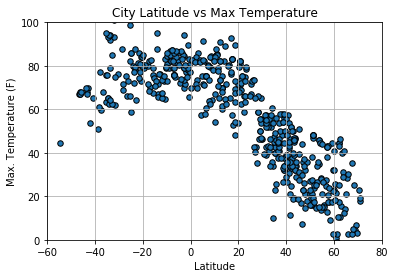

In [10]:
# Lattitude vs Temperature Scatter Plot
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Max Temp"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Max Temperature")

plt.ylim(0,100)
plt.xlim(-60, 80)

plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig("latvstemp.png")

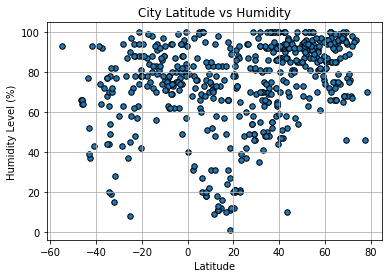

In [11]:
# Lattitude vs Humidity Scatter Plot
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Humidity"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity Level (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('latvshumidity.png')

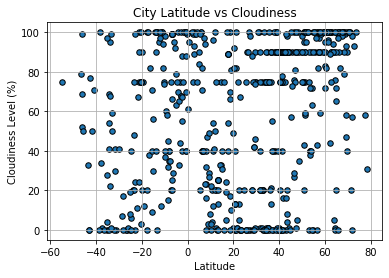

<Figure size 432x288 with 0 Axes>

In [12]:
# Lattitude vs Cloudiness Plot
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Cloudiness"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness Level (%)")
plt.xlabel("Latitude")
plt.grid()
plt.show()

plt.savefig('latvscloud.png')

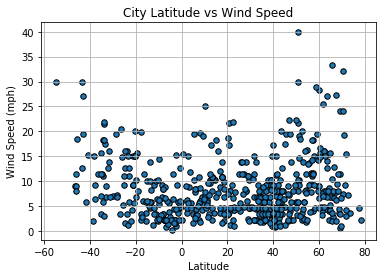

<Figure size 432x288 with 0 Axes>

In [13]:
# Lattitude vs wind speed Plot
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Wind Speed"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.show()

plt.savefig('latvswindspeed.png')

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"]>0.01]
southern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"]<-0.01]

# northern_hemisphere.head()
southern_hemisphere.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,bluff,79,NZ,1580021363,66,-46.60,168.33,66.99,8.99
3,arraial do cabo,0,BR,1580021363,88,-22.84,-46.65,64.40,5.82
4,hithadhoo,100,MV,1580021363,79,-0.60,73.08,83.01,12.75
5,lebu,1,CL,1580021363,92,-37.62,-73.65,59.67,6.40
6,isangel,75,VU,1580021364,94,-19.55,169.27,78.80,15.75


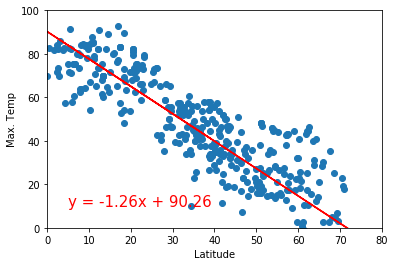

<Figure size 432x288 with 0 Axes>

In [15]:
# Lattitude vs Temperature of City Scatter Plot 
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.show()

plt.savefig("northmaxtempvslat.png")

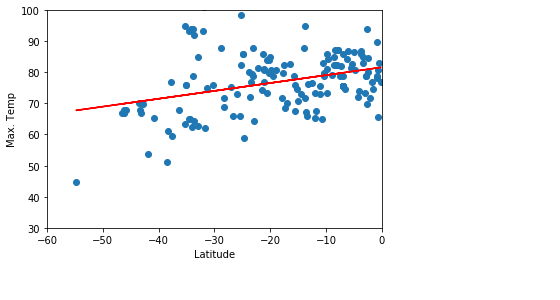

<Figure size 432x288 with 0 Axes>

In [16]:
# Lattitude vs Temperature of City (Southern Hemisphere) Scatter Plot
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.ylim(30, 100)
plt.xlim(-60, 0, 10)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.show()

plt.savefig("southmaxtempvslat.png")

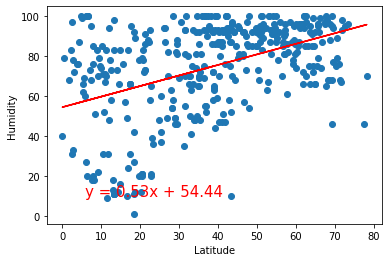

<Figure size 432x288 with 0 Axes>

In [17]:
# Lattitude vs Humidity (northern Hemisphere) Scatter Plot
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

plt.savefig("northhumvslat.png")

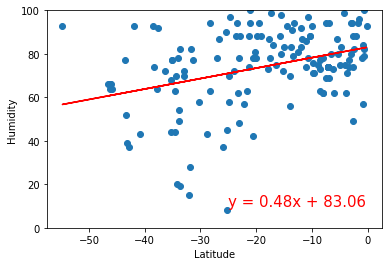

<Figure size 432x288 with 0 Axes>

In [18]:
# Lattitude vs Humidity (southern Hemisphere) Scatter Plot
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.ylim(0, 100)

plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

plt.savefig("southhumvslat.png")

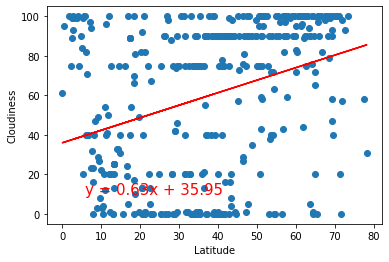

<Figure size 432x288 with 0 Axes>

In [19]:
# Lattitude vs Cloudiness (northern Hemisphere) Scatter Plot
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

plt.savefig("northcloudvslat.png")

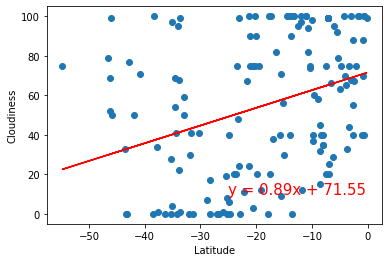

<Figure size 432x288 with 0 Axes>

In [20]:
# Lattitude vs cloudiness (southern Hemisphere) Scatter Plot
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

plt.savefig("southcloudvslat.png")

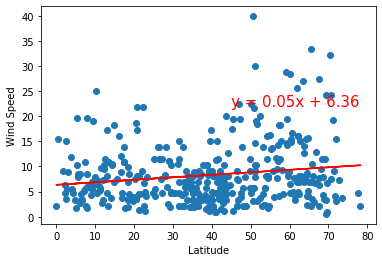

<Figure size 432x288 with 0 Axes>

In [21]:
# Lattitude vs Wind Speed (northern Hemisphere) Scatter Plot
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,22),fontsize=15,color="red")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.show()

plt.savefig("northwindvslat.png")

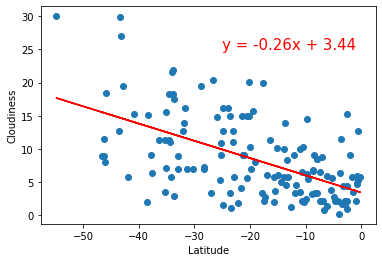

In [22]:
# Lattitude vs Wind Speed (southern Hemisphere) Scatter Plot
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("southwindvslat.png")